<u>QISKIT IMPLEMENTATION<u>


In [ ]:
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile , execute 

# import basic plot tools
from qiskit.visualization import plot_histogram



In [3]:
import numpy as np 
from qiskit import QuantumCircuit

# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()



q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

In [5]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()




┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

In [6]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()


┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

In [7]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

<u>The complete alogrithm:<u>
    


In [8]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [5]:
from qiskit import QuantumCircuit
n=3
balanced_oracle = QuantumCircuit(n+1)
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle
dj_circuit.draw()

/var/folders/xb/lql0wzy10w551cccc_5mrcdc0000gn/T/ipykernel_39592/2175931689.py:15: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [6]:
dj_circuit = QuantumCircuit(n+1, n)
balanced_oracle = QuantumCircuit(n+1)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()


/var/folders/xb/lql0wzy10w551cccc_5mrcdc0000gn/T/ipykernel_39592/4233012751.py:13: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ H ├─░─┤M├──────
     ├───┤├───┤ ░ └╥┘┌─┐   
q_1: ┤ H ├┤ H ├─░──╫─┤M├───
     ├───┤├───┤ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░──╫──╫──╫─
     └───┘└───┘ ░  ║  ║  ║ 
c: 3/══════════════╩══╩══╩═
                   0  1  2

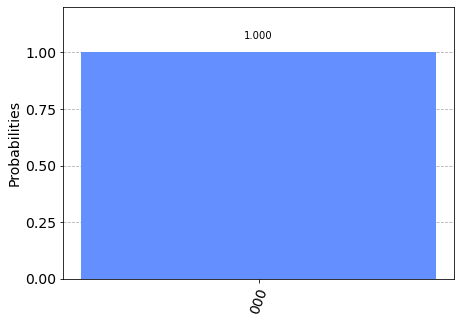

In [10]:
from qiskit import Aer
from qiskit import assemble
from qiskit.visualization import plot_histogram
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)


In [15]:
import qiskit
from qiskit import *
from qiskit.visualization import plot_histogram
import random

size=int(input("Enter size : "))
def rand_key(p):
    key1 = ""
    for i in range(p):
        temp = str(random.randint(0, 1))
        key1 += temp    
    return(key1)

def xgate(r,p) :
    for i in range(p) :
        if r[i]=='1' :
            qc.x(i)
    qc.barrier()

Enter size :  4


In [16]:
qc=QuantumCircuit(size+1,size)

inp=rand_key(size)

for i in range(size) :
    qc.h(i)

qc.x(size)
qc.h(size)
qc.barrier()
xgate(inp,size)
qc.cx(0,size)
qc.barrier()
qc.draw()

┌───┐      ░ ┌───┐ ░       ░ 
q_0: ┤ H ├──────░─┤ X ├─░───■───░─
     ├───┤      ░ ├───┤ ░   │   ░ 
q_1: ┤ H ├──────░─┤ X ├─░───┼───░─
     ├───┤      ░ └───┘ ░   │   ░ 
q_2: ┤ H ├──────░───────░───┼───░─
     ├───┤      ░       ░   │   ░ 
q_3: ┤ H ├──────░───────░───┼───░─
     ├───┤┌───┐ ░       ░ ┌─┴─┐ ░ 
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├─░─
     └───┘└───┘ ░       ░ └───┘ ░ 
c: 4/═════════════════════════════

In [17]:
xgate(inp,size)
for i in range(size) :
    qc.h(i)
qc.barrier()
for i in range(size) :
    qc.measure(i,i)
qc.draw()

┌───┐      ░ ┌───┐ ░       ░ ┌───┐ ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├──────░─┤ X ├─░───■───░─┤ X ├─░─┤ H ├─░─┤M├─────────
     ├───┤      ░ ├───┤ ░   │   ░ ├───┤ ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░─┤ X ├─░───┼───░─┤ X ├─░─┤ H ├─░──╫─┤M├──────
     ├───┤      ░ └───┘ ░   │   ░ └───┘ ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────░───────░───┼───░───────░─┤ H ├─░──╫──╫─┤M├───
     ├───┤      ░       ░   │   ░       ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░───────░───┼───░───────░─┤ H ├─░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░       ░ ┌─┴─┐ ░       ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├─░───────░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░       ░ └───┘ ░       ░       ░  ║  ║  ║  ║ 
c: 4/══════════════════════════════════════════════╩══╩══╩══╩═
                                                   0  1  2  3

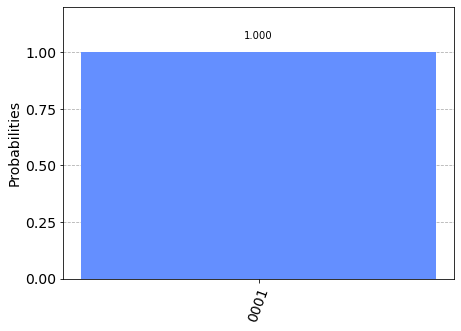

In [18]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc , backend , shots =100000).result()
count = results.get_counts()
plot_histogram(count)